In [37]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [38]:
# load data set
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')
print("Shape of DataFrame is ", bank_data.shape)

Shape of DataFrame is  (41188, 21)


### Exploratory data analysis

In [39]:
# Closer look at data
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [40]:
# Statistical summary of our dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [41]:
# iterated through bank_data and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in bank_data.columns if bank_data[n].dtypes == 'object']
cat_col.remove('y')

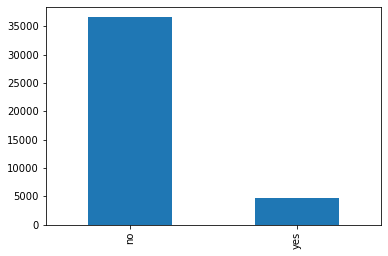

In [42]:
# column y has unbalanced data
bank_data['y'].value_counts().plot.bar()

### Visualization

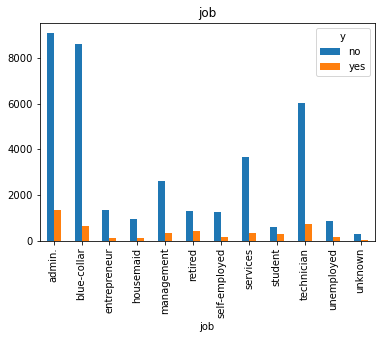

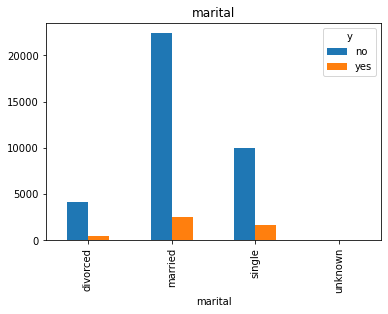

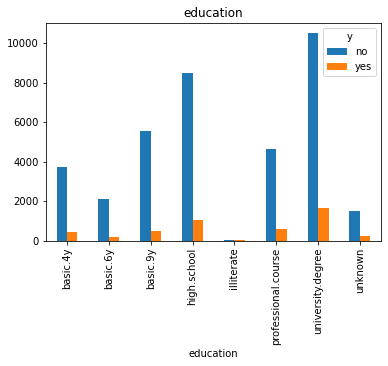

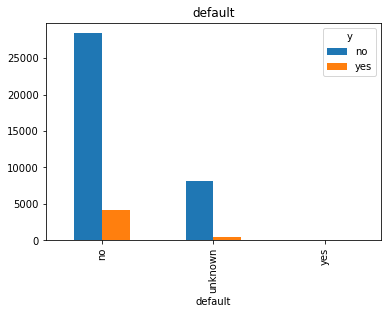

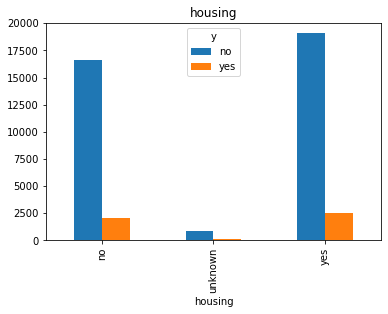

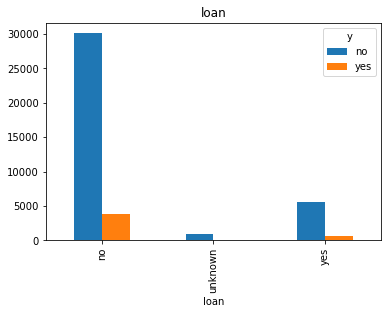

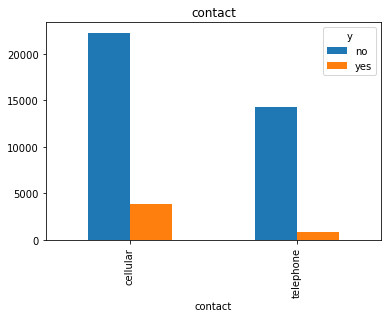

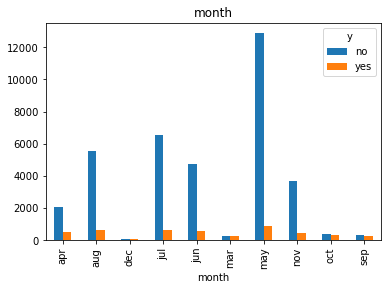

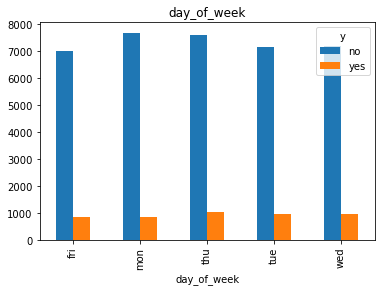

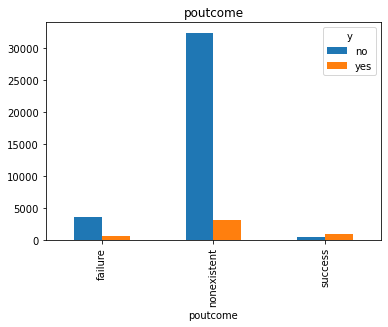

In [43]:
for col in cat_col:
    pd.crosstab(bank_data[col], bank_data.y).plot(kind = 'bar')
    plt.title(col)

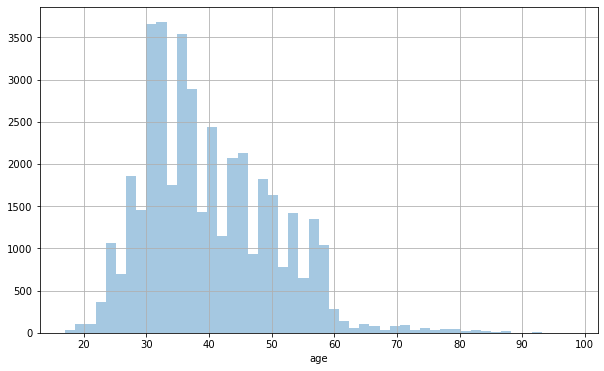

In [45]:
plt.figure(figsize = (10, 6))
plt.grid(b = True)
sns.distplot(a = bank_data['age'], kde = False)

### Feature engineering

In [46]:
# Transform 'yes' and 'no'  into (0,1) dependency
bank_data['y']=[1 if i=='yes' else 0 for i in bank_data['y']]

In [47]:
#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
bank_data = pd.get_dummies(bank_data,columns = ['job','marital','education','default',
                                   'housing','loan','month', 'contact',
                                   'day_of_week','poutcome'], drop_first = True)


In [48]:
bank_data.shape

(41188, 54)

### Preprocessing

In [95]:
# split dataset into data and target sets
data = bank_data.loc[:, bank_data.columns != 'y']
target = bank_data.loc[:, bank_data.columns == 'y']

In [96]:
data_np = np.array(data)
target_np = np.array(target)
#target = np.array(target).reshape(-1, 1)

In [97]:
print(data_np.shape)
print(target_np.shape)

(41188, 53)
(41188, 1)


In [98]:
# split data and target sets into 4 sets for train and test purposes
bank_train_data, bank_test_data, \
bank_train_target, bank_test_target = \
train_test_split(data_np, target_np, test_size=0.1)

In [79]:
# scale data
#sc = StandardScaler()
#bank_train_data = sc.fit_transform(bank_train_data)
# with scaling data accu_score = 0,11 ?

### Learning

In [80]:
# Training our model
logistic_regression = LogisticRegression()
logistic_regression.fit(bank_train_data, bank_train_target)


C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model evaluation

In [81]:
# Evaluate accuracy of our model
print("Basic Logistic Regression")
accu_score = accuracy_score(bank_test_target, logistic_regression.predict(bank_test_data))
print("Basic model accuracy = {0:0.2f}".format(accu_score))

Basic Logistic Regression
Basic model accuracy = 0.91


[[3553  109]
 [ 255  202]]


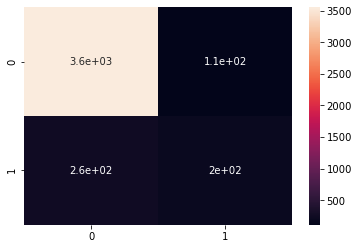

In [82]:
# confusion matrix
conf_matrix = confusion_matrix(bank_test_target, logistic_regression.predict(bank_test_data))
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [90]:
def cross_valid_data(numbOfIteration):
    print("\nCross walidacja:")
    scores = cross_val_score(LogisticRegression(), data, target.ravel(), cv=numbOfIteration)
    plt.figure(figsize=(1, 5))
    sns.heatmap(scores[:, np.newaxis],annot=True)
    plt.show()
    
def compare_given_result_with_real(left_bound, right_bound):
    for i in range(left_bound, right_bound):
        pred = logistic_regression.predict(bank_test_data[i, :].reshape(1, -1))
        print("\nModel predicted for client {0} value {1}".format(i, pred))
        print("Real value for client \"{0}\" is {1}".format(i, bank_test_target[i]))
        #Wyświetlenie 
        print(logistic_regression.predict_proba(bank_test_data[i,:].reshape(1,-1)))
        


Model predicted for client 0 value [0]
Real value for client "0" is [0]
[[0.98754171 0.01245829]]

Model predicted for client 1 value [0]
Real value for client "1" is [0]
[[0.92343566 0.07656434]]

Model predicted for client 2 value [0]
Real value for client "2" is [0]
[[0.73572867 0.26427133]]

Model predicted for client 3 value [0]
Real value for client "3" is [0]
[[0.52967724 0.47032276]]

Model predicted for client 4 value [0]
Real value for client "4" is [1]
[[0.53500998 0.46499002]]

Model predicted for client 5 value [0]
Real value for client "5" is [0]
[[0.92212646 0.07787354]]

Model predicted for client 6 value [0]
Real value for client "6" is [1]
[[0.76337718 0.23662282]]

Model predicted for client 7 value [0]
Real value for client "7" is [0]
[[0.91867655 0.08132345]]

Model predicted for client 8 value [0]
Real value for client "8" is [0]
[[0.96981119 0.03018881]]

Model predicted for client 9 value [0]
Real value for client "9" is [0]
[[0.92082948 0.07917052]]

Cross wal

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

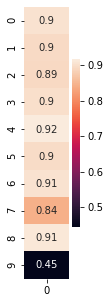

In [91]:
compare_given_result_with_real(0, 10)
cross_valid_data(10)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

#bank_data2 = pd.read_csv("bank-additional-full.csv", sep=';')data2 = bank_data2.loc[:, bank_data.columns != 'y']

sns.pairplot(data, diag_kind = "kde")

C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369:

Error in callback <function flush_figures at 0x00000274CF34D820> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\IPython\core\events.py", line 88, in trigger
    func(*args, **kwargs)
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 121, in flush_figures
    return show(True)
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 41, in show
    display(
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\IPython\core\display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\IPython\core\formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "C:\Users\Grzegorz\anaconda3\lib\site-packages\IPython\core\formatters

In [100]:
# Mean squared error and variance score of a basic logistic model
from sklearn.metrics import mean_squared_error

m_squared_error = mean_squared_error(bank_test_target, logistic_regression.predict(bank_test_data))
print("Mean squared error = %.2f" % m_squared_error)

var_score = logistic_regression.score(bank_test_data, bank_test_target)
print("Logistic Regression variance score: %.2f" % var_score)

Mean squared error = 0.09
Logistic Regression variance score: 0.91


## Polynomial features and RFE